In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [11]:
# columns of dataset
columns = ["height","lenght","area","eccen","p_black","p_and","mean_tr","blackpix","blackand","wb_trans","class"]

df = pd.read_csv(r"C:\Users\Dell\Desktop\page-blocks.csv" ,sep="\s+",names=columns,header=None,)

In [12]:
df.shape  # dimension of dataset

(5473, 11)

In [13]:
df.head()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 11 columns):
height      5473 non-null int64
lenght      5473 non-null int64
area        5473 non-null int64
eccen       5473 non-null float64
p_black     5473 non-null float64
p_and       5473 non-null float64
mean_tr     5473 non-null float64
blackpix    5473 non-null int64
blackand    5473 non-null int64
wb_trans    5473 non-null int64
class       5473 non-null int64
dtypes: float64(4), int64(7)
memory usage: 470.4 KB


In [15]:
df.isna().sum() #no missing value is present

height      0
lenght      0
area        0
eccen       0
p_black     0
p_and       0
mean_tr     0
blackpix    0
blackand    0
wb_trans    0
class       0
dtype: int64

In [21]:
df.describe().T  #statistical analysis

,count,mean,std,min,25%,50%,75%,max
height,5473.0,10.473232,18.960564,1.000,7.000,8.000,10.000,804.0
lenght,5473.0,89.568244,114.721758,1.000,17.000,41.000,107.000,553.0
area,5473.0,1198.405628,4849.376950,7.000,114.000,322.000,980.000,143993.0
eccen,5473.0,13.753977,30.703737,0.007,2.143,5.167,13.625,537.0
p_black,5473.0,0.368642,0.177757,0.052,0.261,0.337,0.426,1.0
p_and,5473.0,0.785053,0.170661,0.062,0.679,0.803,0.927,1.0
mean_tr,5473.0,6.219278,69.079021,1.000,1.610,2.070,3.000,4955.0
blackpix,5473.0,365.930751,1270.333082,7.000,42.000,108.000,284.000,33017.0
blackand,5473.0,741.108167,1881.504302,7.000,95.000,250.000,718.000,46133.0
wb_trans,5473.0,106.662891,167.308362,1.000,17.000,49.000,126.000,3212.0


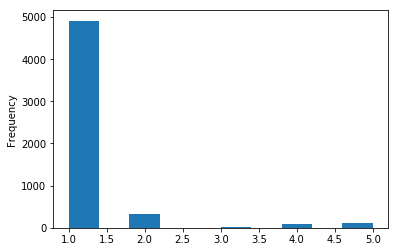

In [22]:
df['class'].plot(kind='hist') # highly imbalanced dataset

### Distribution of all attributes

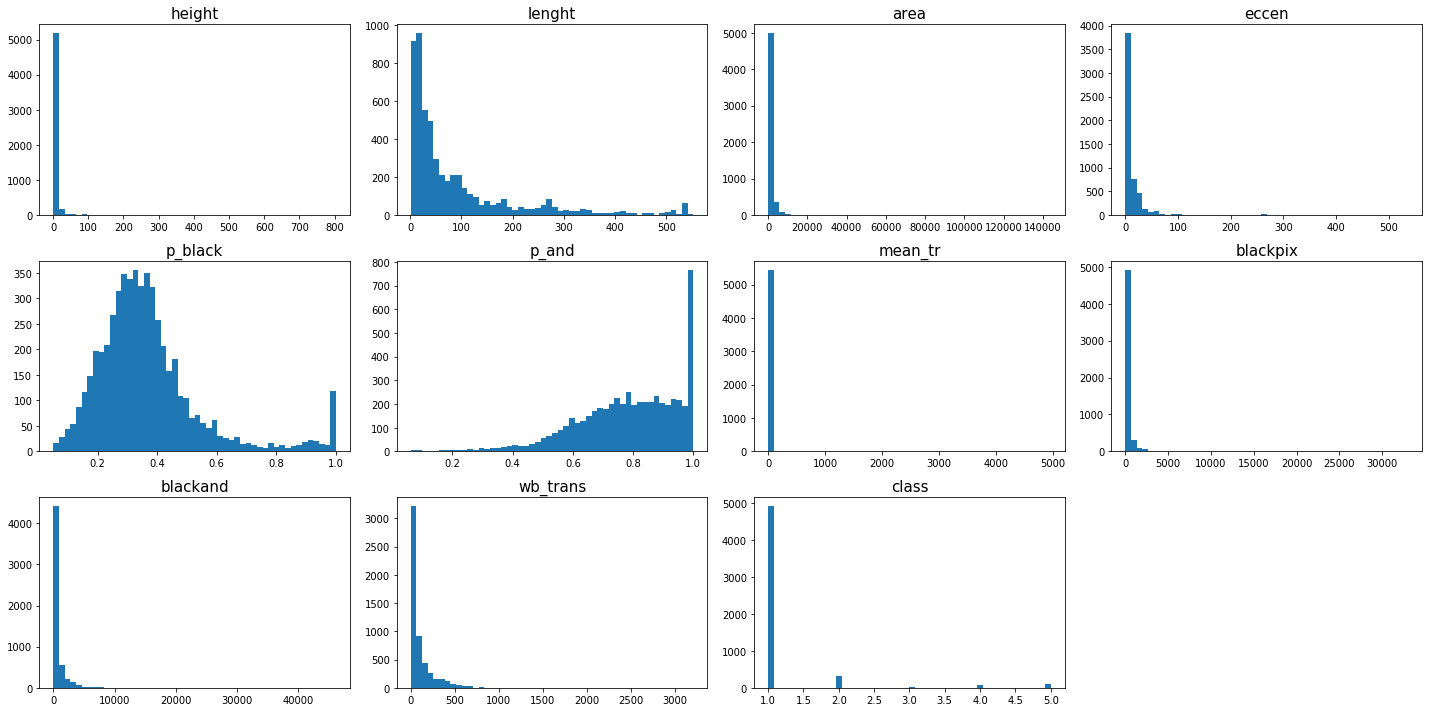

In [23]:
i=1
plt.figure(figsize=(20,10))

for col in df.columns:
    plt.subplot(3,4,i)
    plt.hist(df[col],bins=50)
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

### Relationship between other attributes with target attribute

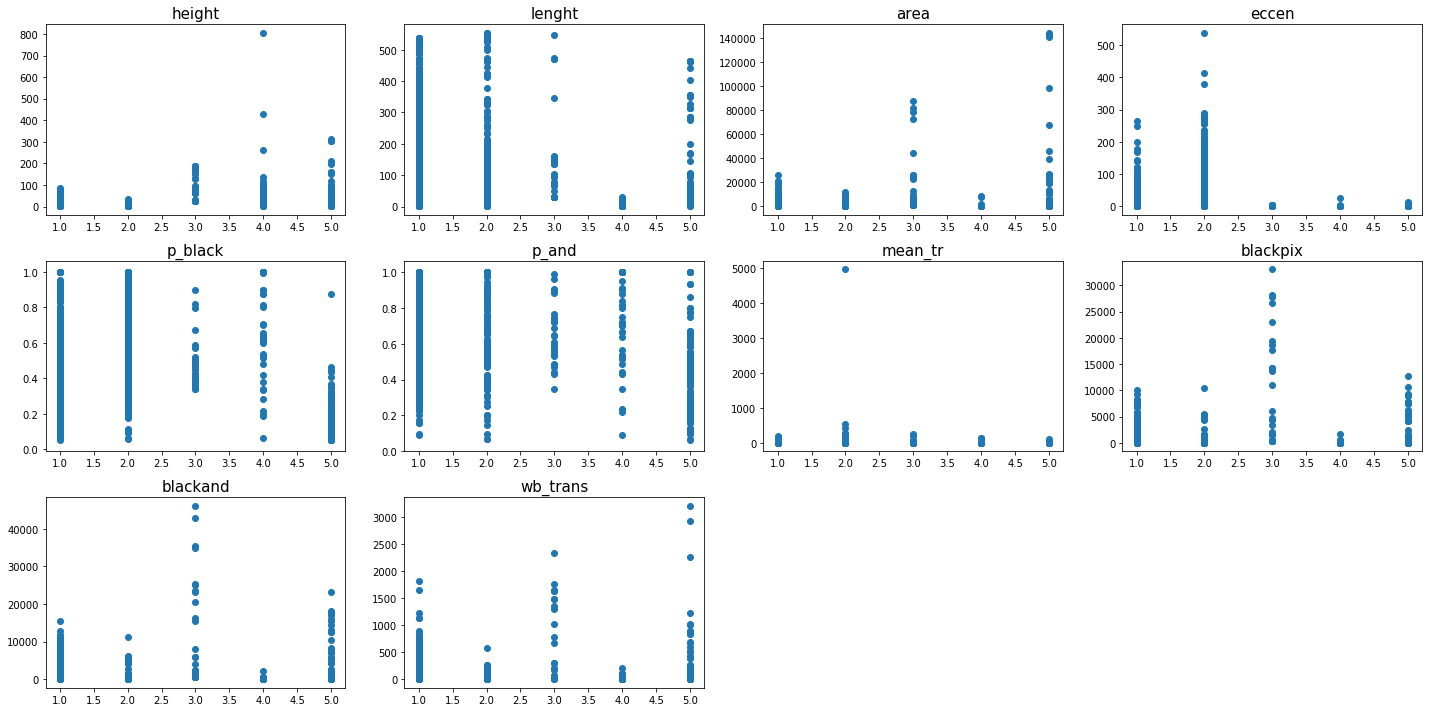

In [24]:
i=1
plt.figure(figsize=(20,10))

for col in df.drop(columns='class').columns:
    plt.subplot(3,4,i)
    plt.scatter(df['class'],df[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

### Boxplot of all attributes ( Outlier Detection )

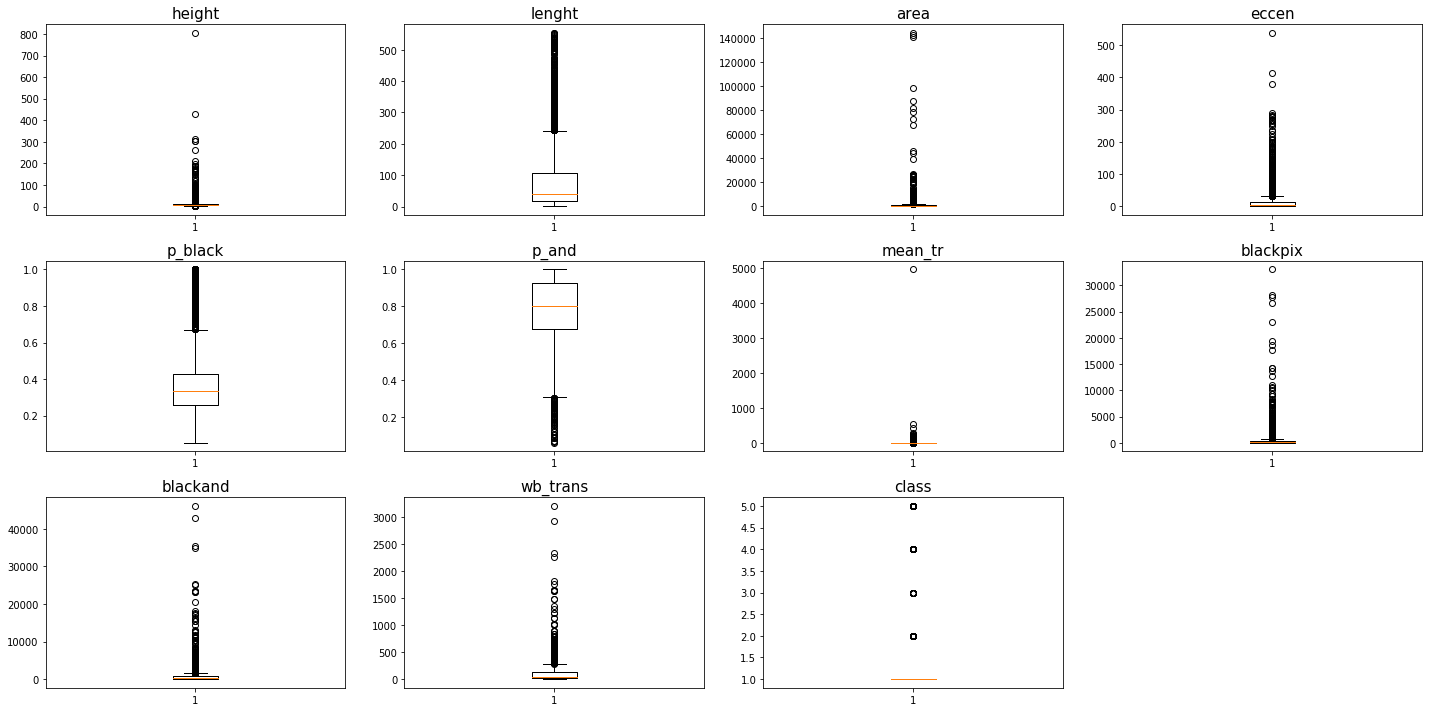

In [25]:
i=1
plt.figure(figsize=(20,10))

for col in df.columns:
    plt.subplot(3,4,i)
    plt.boxplot(df[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

### Removing Outliers 

In [26]:
df = df[df['height']<250] 
df = df[df['area']<35000]
df = df[df['eccen']<300]
df = df[df['mean_tr']<4000]
df = df[df['blackand']<30000]
df = df[df['wb_trans']<2000]

### After Removing Outliers 

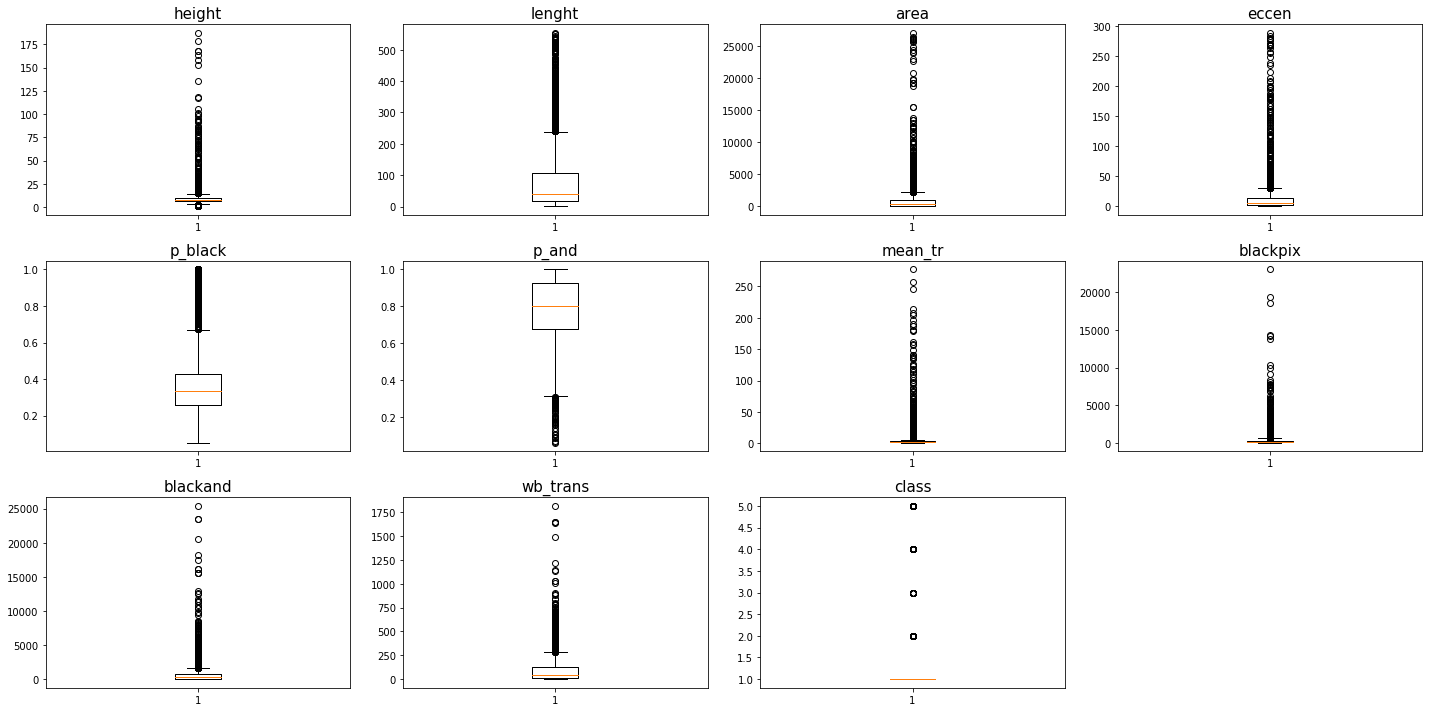

In [27]:
i=1
plt.figure(figsize=(20,10))

for col in df.columns:
    plt.subplot(3,4,i)
    plt.boxplot(df[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

In [29]:
from sklearn.utils import shuffle
df = shuffle(df)

In [30]:
X = df.drop(columns=['class'])
Y = df['class']

#### Normalization ( z-score )

In [31]:
X= (X-X.mean())/X.std()

### Gaussian NB

In [32]:
GBN = GaussianNB()

In [33]:
scores = pd.DataFrame(columns=['MIN','MAX','AVG']) #dataframe for storing scores

#### 5-Fold Cross-validation

In [34]:
score5 = cross_val_score(GBN,X,Y,cv=5,verbose=3)

[CV]  ................................................................
[CV] ....................... , score=0.7802197802197802, total=   0.0s
[CV]  ................................................................
[CV] ........................ , score=0.793040293040293, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.7864344637946837, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.9302112029384757, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8071625344352618, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [35]:
print("MIN - " , score5.min())
print("AVG - " , score5.mean())
print("MAX - " , score5.max())

MIN -  0.7802197802197802
AVG -  0.8194136548856988
MAX -  0.9302112029384757


#### 10-Fold Cross-validation

In [36]:
score10 = cross_val_score(GBN,X,Y,cv=10,verbose=3)

[CV]  ................................................................
[CV] ....................... , score=0.8102189781021898, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.7718978102189781, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.7989031078610603, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.7948717948717948, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.7637362637362637, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8106617647058824, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.9283088235294118, total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [37]:
print("MIN - " , score10.min())
print("AVG - " , score10.mean())
print("MAX - " , score10.max())

MIN -  0.7637362637362637
AVG -  0.8074946446827985
MAX -  0.9283088235294118


### Calculate the cross validation score on different split point in k-fold


In [38]:
for i in range(1,20):
    score = cross_val_score(GBN,X,Y,cv=i+1)
    scores.loc[i+1] = [score.min() , score.max() , score.mean()]

Text(0.5, 1.0, 'Accuracy Vs N_Split')

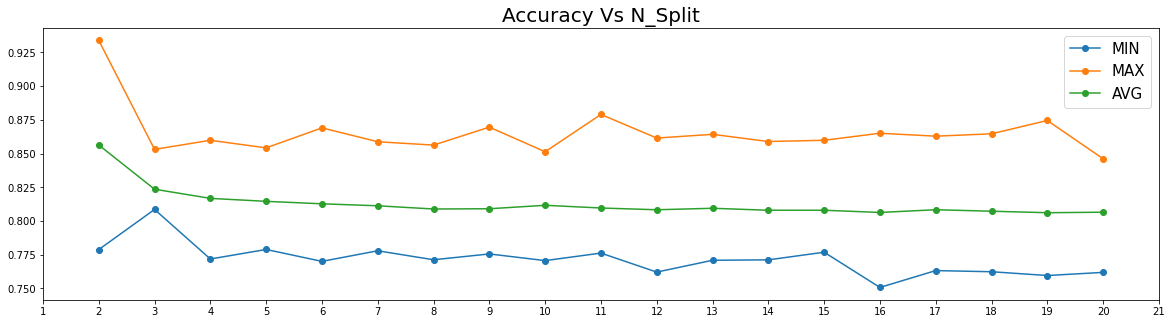

In [37]:
plt.figure(figsize=(20,5))

plt.plot(scores['MIN'],marker='o')
plt.plot(scores['MAX'],marker='o')
plt.plot(scores['AVG'],marker='o')

plt.xticks(np.arange(1, 22, 1.0))
plt.legend(['MIN','MAX','AVG'],fontsize=15)
plt.title("Accuracy Vs N_Split" ,fontsize=20)

#### Stratified K-Fold

In [39]:
scores2 = pd.DataFrame(columns=['MIN','MAX','AVG']) #dataframe for storing scores

In [40]:
#calculate the cross validation score on different split point in stratified k-fold and store into dataframe
for i in range(1,20):
    cv = StratifiedKFold(n_splits=i+1,shuffle=True)
    score = cross_val_score(GBN,X,Y,cv=cv)               #Crossvalidation
    scores2.loc[i+1] = [score.min() , score.max() , score.mean()]

Text(0.5,1,'Accuracy Vs N_Split')

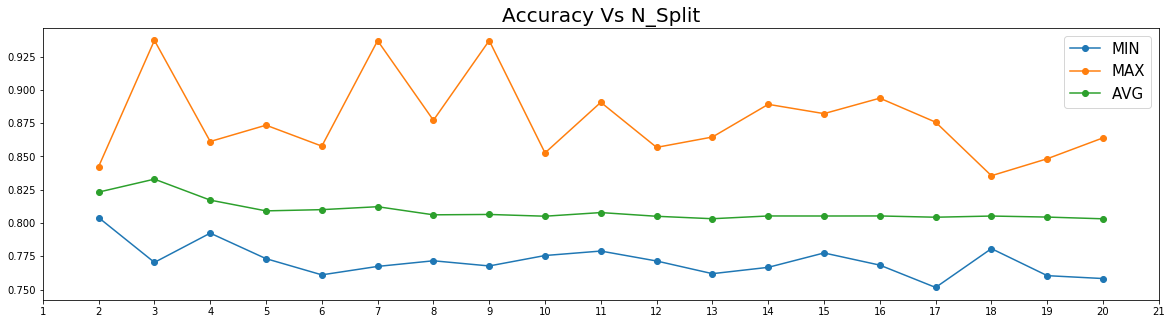

In [42]:
plt.figure(figsize=(20,5))

plt.plot(scores2['MIN'],marker='o')
plt.plot(scores2['MAX'],marker='o')
plt.plot(scores2['AVG'],marker='o')

plt.xticks(np.arange(1, 22, 1.0))
plt.legend(['MIN','MAX','AVG'],fontsize=15)
plt.title("Accuracy Vs N_Split" ,fontsize=20)